In [1]:
import pandas as pd 
df = pd.read_csv('clean_nodiff_final.csv')
social = pd.read_csv('daily_average_scores.csv')

In [2]:
social

,created_at,neutral,positive,negative
0,2021-02-01,0.681607,0.219100,0.099300
1,2021-02-02,0.897100,0.072325,0.030575
2,2021-02-03,0.633244,0.318117,0.048639
3,2021-02-04,0.786742,0.093329,0.119962
4,2021-02-05,0.534500,0.442318,0.023171
...,...,...,...,...
810,2023-06-08,0.767732,0.123735,0.108530
811,2023-06-09,0.747077,0.132968,0.119934
812,2023-06-10,0.759321,0.106608,0.134074
813,2023-06-11,0.849545,0.115255,0.035233


In [3]:
from sklearn.preprocessing import StandardScaler


datetime_column = social['created_at']

# Drop the datetime column for scaling
social_numeric = social.drop('created_at', axis=1)

# Apply the StandardScaler
scaler = StandardScaler()
social_scaled = scaler.fit_transform(social_numeric)

# Convert the scaled features back to a DataFrame
social_scaled_df = pd.DataFrame(social_scaled, columns=social_numeric.columns, index=social_numeric.index)

# Add the datetime column back
social_scaled_df['created_at'] = datetime_column


social_scaled_df

,neutral,positive,negative,created_at
0,0.095626,0.149952,-0.278450,2021-02-01
1,1.097705,-0.749703,-0.703512,2021-02-02
2,-0.129269,0.756874,-0.591788,2021-02-03
3,0.584519,-0.620958,-0.150653,2021-02-04
4,-0.588448,1.518163,-0.749305,2021-02-05
...,...,...,...,...
810,0.496123,-0.434589,-0.221363,2023-06-08
811,0.400070,-0.377992,-0.150827,2023-06-09
812,0.457009,-0.539566,-0.063374,2023-06-10
813,0.876565,-0.486566,-0.674706,2023-06-11


In [4]:
df

,timestamp,coin_id,Market Cap,low,high,open,close,volume,3m_yield,2yr_yield,5yr_yield,7yr_yield,10yr_yield,30yr_yield,federal_funds_rate
0,2021-01-01,aave,-0.321152,-0.409663,-0.408853,-0.409147,-0.408932,-0.308960,-0.986718,-1.274771,-1.547996,-1.609985,-1.589879,-1.479714,-0.945036
1,2021-01-02,aave,-0.321427,-0.409844,-0.408754,-0.408955,-0.409344,-0.309181,-0.986718,-1.274771,-1.547996,-1.609985,-1.589879,-1.479714,-0.945036
2,2021-01-03,aave,-0.320778,-0.409931,-0.408551,-0.409361,-0.408719,-0.306071,-0.986718,-1.274771,-1.547996,-1.609985,-1.589879,-1.479714,-0.945036
3,2021-01-04,aave,-0.319837,-0.409698,-0.406966,-0.408724,-0.407123,-0.295404,-0.986718,-1.274771,-1.547996,-1.609985,-1.589879,-1.479714,-0.945036
4,2021-01-05,aave,-0.319043,-0.408609,-0.406355,-0.407144,-0.406690,-0.295986,-0.986718,-1.264300,-1.534108,-1.594315,-1.563520,-1.437053,-0.945036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17998,2023-11-19,zrx,-0.327158,-0.416477,-0.415699,-0.416015,-0.415994,0.443716,1.371470,1.226088,1.287510,1.385602,1.482368,1.630980,1.452373
17999,2023-11-20,zrx,-0.327162,-0.416477,-0.415702,-0.416014,-0.415994,0.070244,1.377254,1.227833,1.285195,1.382991,1.476511,1.623870,1.452373
18000,2023-11-21,zrx,-0.327172,-0.416478,-0.415702,-0.416015,-0.415996,0.189646,1.372916,1.212126,1.264363,1.367321,1.467725,1.623870,1.452373
18001,2023-11-22,zrx,-0.327157,-0.416478,-0.415701,-0.416017,-0.415993,-0.016675,1.377254,1.227833,1.285195,1.382991,1.476511,1.602539,1.452373


In [5]:
social_scaled_df = social_scaled_df.rename(columns={'created_at': 'timestamp'})
social_scaled_df['timestamp'] = pd.to_datetime(social_scaled_df['timestamp'])
social_scaled_df.set_index('timestamp', inplace=True)

In [6]:
# Find the minimum and maximum dates in the entire dataset
min_date = social_scaled_df.index.min()
max_date = social_scaled_df.index.max()

# Create a complete date range between min_date and max_date
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')

# Reindex the DataFrame using the complete date range
reindexed_df = social_scaled_df.reindex(all_dates)

# Reset index to make 'timestamp' a column again
reindexed_df.reset_index(inplace=True)
reindexed_df.rename(columns={'index': 'timestamp'}, inplace=True)


reindexed_df

,timestamp,neutral,positive,negative
0,2021-02-01,0.095626,0.149952,-0.278450
1,2021-02-02,1.097705,-0.749703,-0.703512
2,2021-02-03,-0.129269,0.756874,-0.591788
3,2021-02-04,0.584519,-0.620958,-0.150653
4,2021-02-05,-0.588448,1.518163,-0.749305
...,...,...,...,...
857,2023-06-08,0.496123,-0.434589,-0.221363
858,2023-06-09,0.400070,-0.377992,-0.150827
859,2023-06-10,0.457009,-0.539566,-0.063374
860,2023-06-11,0.876565,-0.486566,-0.674706


In [7]:
reindexed_df.isnull().sum()

timestamp     0
neutral      47
positive     47
negative     47
dtype: int64

In [8]:
# Rolling window Imputation for Social Media Data 'positive', 'negative', 'neutral'

# Define the size of the rolling window
window_size = 4 

# Apply rolling window and fill missing values with the mean 
reindexed_df['positive'] = reindexed_df['positive'].fillna(reindexed_df['positive'].rolling(window=window_size, min_periods=1).mean())
reindexed_df['negative'] = reindexed_df['negative'].fillna(reindexed_df['negative'].rolling(window=window_size, min_periods=1).mean())
reindexed_df['neutral'] = reindexed_df['neutral'].fillna(reindexed_df['neutral'].rolling(window=window_size, min_periods=1).mean())


# Rolling Window Imputation

A rolling window mean or median was calculated for entries with missing social media sentiment (positive, negative, neutral) and used to fill missing values. This approach takes prioritizes local trends in crypto social media acitvity which can be more representative than a global mean/median of social media sentiment. 

Given the model focuses on daily price prediction, the rolling window is kept relatively small to reflect short term changes in sentiment. This allows for some smoothing of the time series data while capturing short term fluctations in sentiment. This approach is particularly useful for filling in missing values in time series data, as it considers the trend and continuity of the data. By using the mean of the nearest available data points, you get a reasonable estimate that reflects the surrounding data context.


In [9]:
reindexed_df.isnull().sum()

timestamp    0
neutral      0
positive     0
negative     0
dtype: int64

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
merged_df = pd.merge(df, reindexed_df, on='timestamp')

In [11]:
merged_df.isnull().sum()

timestamp             0
coin_id               0
Market Cap            0
low                   0
high                  0
open                  0
close                 0
volume                0
3m_yield              0
2yr_yield             0
5yr_yield             0
7yr_yield             0
10yr_yield            0
30yr_yield            0
federal_funds_rate    0
neutral               0
positive              0
negative              0
dtype: int64

In [12]:
merged_df.set_index('timestamp', inplace=True)
# Sorting the DataFrame first by 'coin_id' and then by 'timestamp' in ascending order
merged_df = merged_df.sort_values(by=['coin_id', 'timestamp'], ascending=[True, True])
merged_df

,coin_id,Market Cap,low,high,open,close,volume,3m_yield,2yr_yield,5yr_yield,7yr_yield,10yr_yield,30yr_yield,federal_funds_rate,neutral,positive,negative
timestamp,,,,,,,,,,,,,,,,,
2021-02-01,aave,-0.306440,-0.393619,-0.392502,-0.392657,-0.393087,-0.305786,-0.995393,-1.274771,-1.506332,-1.515965,-1.449299,-1.287740,-0.949611,0.095626,0.149952,-0.278450
2021-02-02,aave,-0.305833,-0.393537,-0.392557,-0.393084,-0.392397,-0.303499,-0.995393,-1.274771,-1.485500,-1.492460,-1.422940,-1.255744,-0.949611,1.097705,-0.749703,-0.703512
2021-02-03,aave,-0.300181,-0.392249,-0.386337,-0.392415,-0.386008,-0.299447,-1.008406,-1.274771,-1.478555,-1.476790,-1.396582,-1.202418,-0.949611,-0.129269,0.756874,-0.591788
2021-02-04,aave,-0.294368,-0.385480,-0.374449,-0.386030,-0.379639,-0.259555,-1.008406,-1.274771,-1.478555,-1.476790,-1.396582,-1.191753,-0.949611,0.584519,-0.620958,-0.150653
2021-02-05,aave,-0.291596,-0.379029,-0.374289,-0.379656,-0.376583,-0.293084,-1.012744,-1.285242,-1.471611,-1.461120,-1.361437,-1.149092,-0.949611,-0.588448,1.518163,-0.749305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-08,zrx,-0.326389,-0.416492,-0.415717,-0.416030,-0.416009,-0.226877,1.307853,1.034117,0.889382,0.865880,0.870262,0.898633,1.337993,0.496123,-0.434589,-0.221363
2023-06-09,zrx,-0.326398,-0.416492,-0.415717,-0.416030,-0.416009,-0.139854,1.303515,1.070766,0.924102,0.897220,0.887834,0.898633,1.337993,0.400070,-0.377992,-0.150827
2023-06-10,zrx,-0.326518,-0.416495,-0.415717,-0.416030,-0.416011,0.082394,1.307853,1.063785,0.917158,0.891996,0.881977,0.891523,1.337993,0.457009,-0.539566,-0.063374


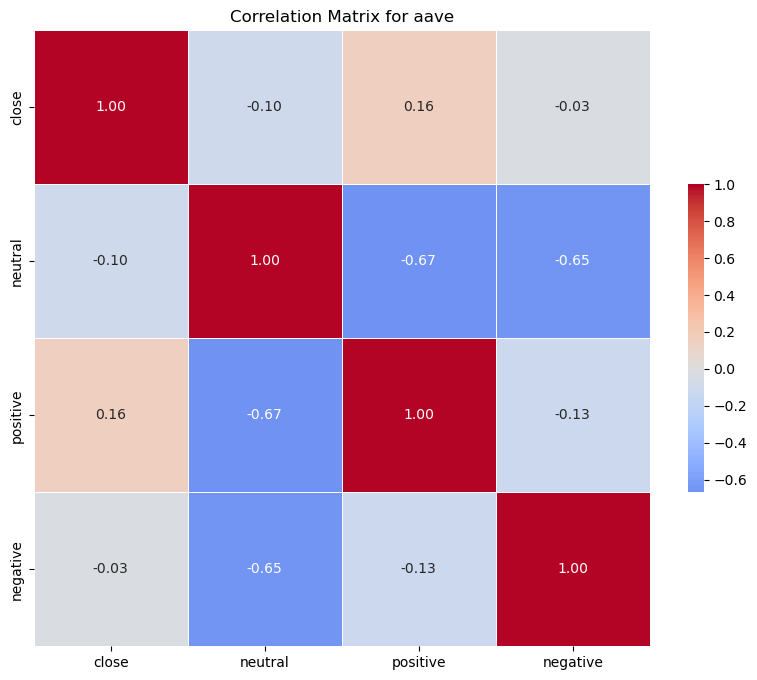

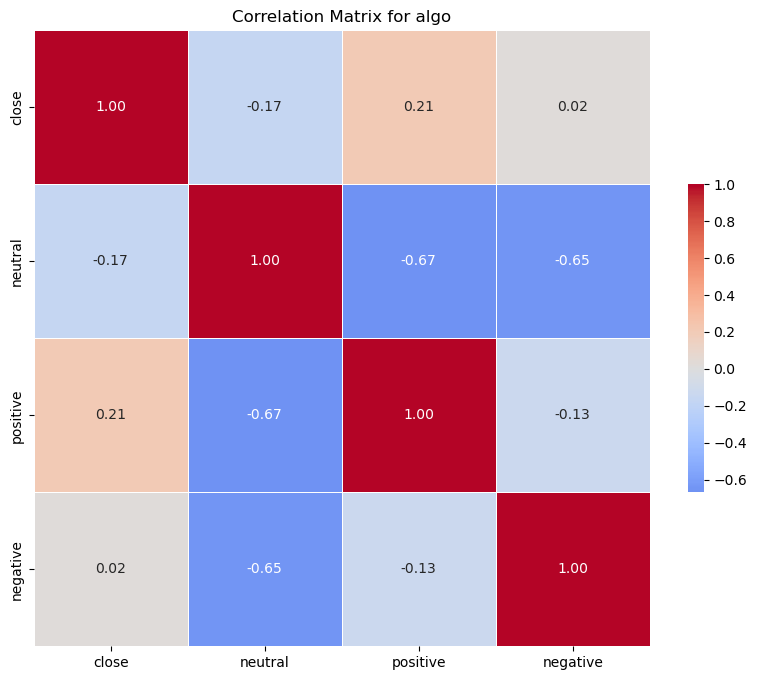

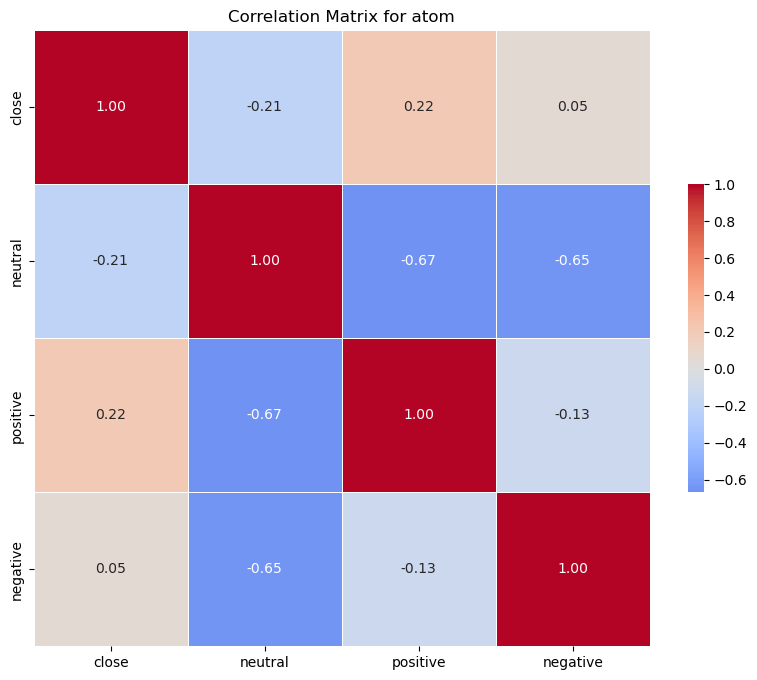

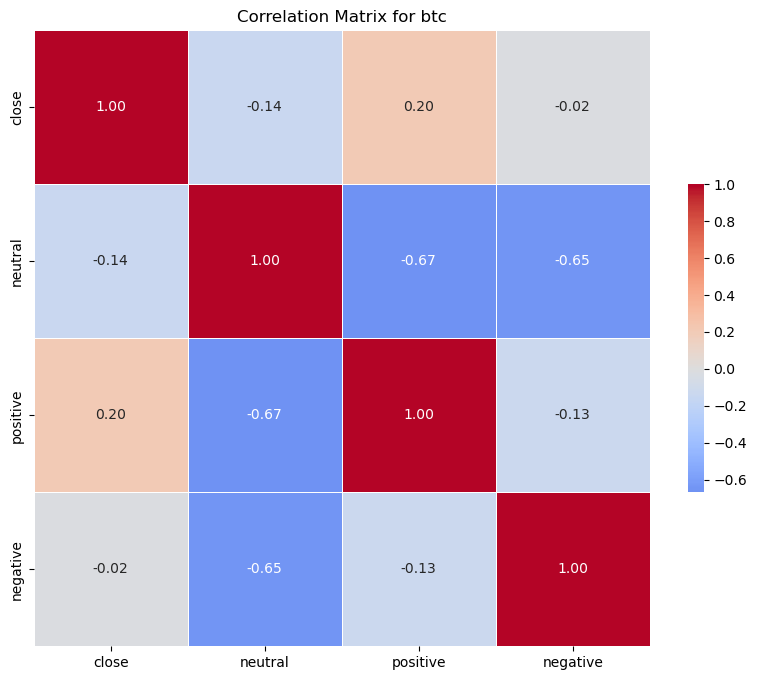

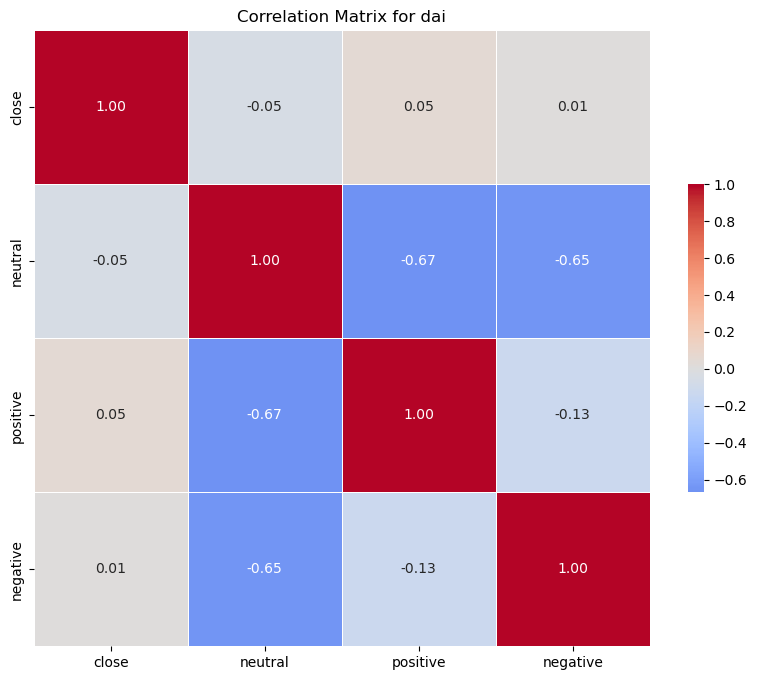

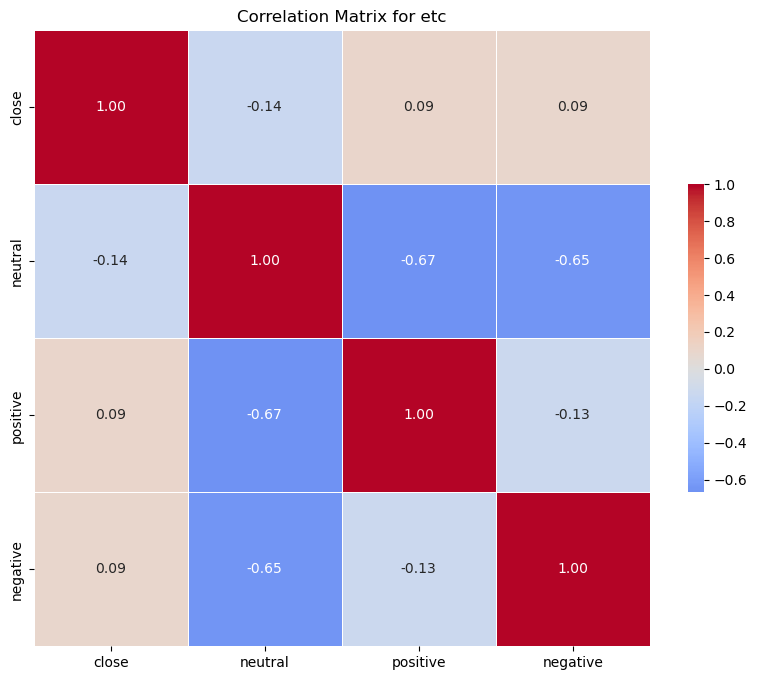

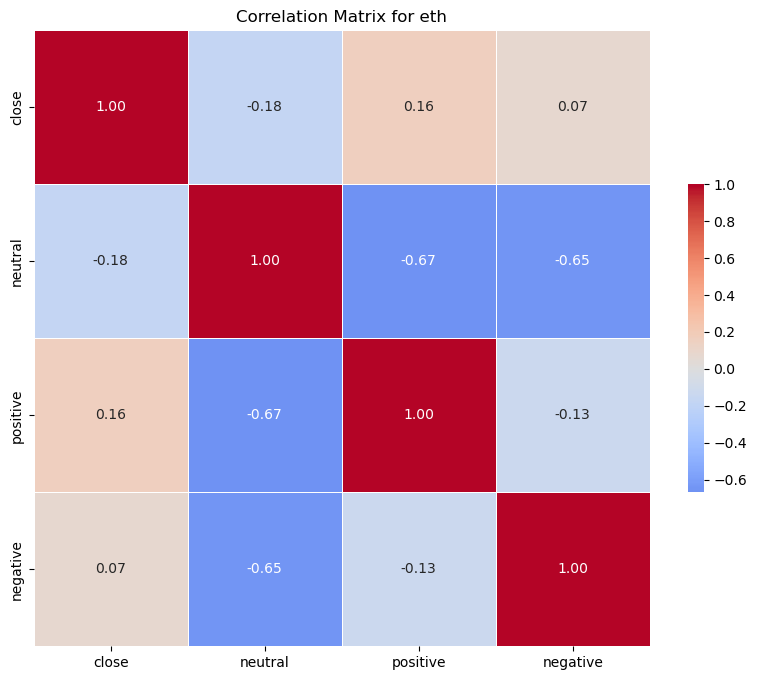

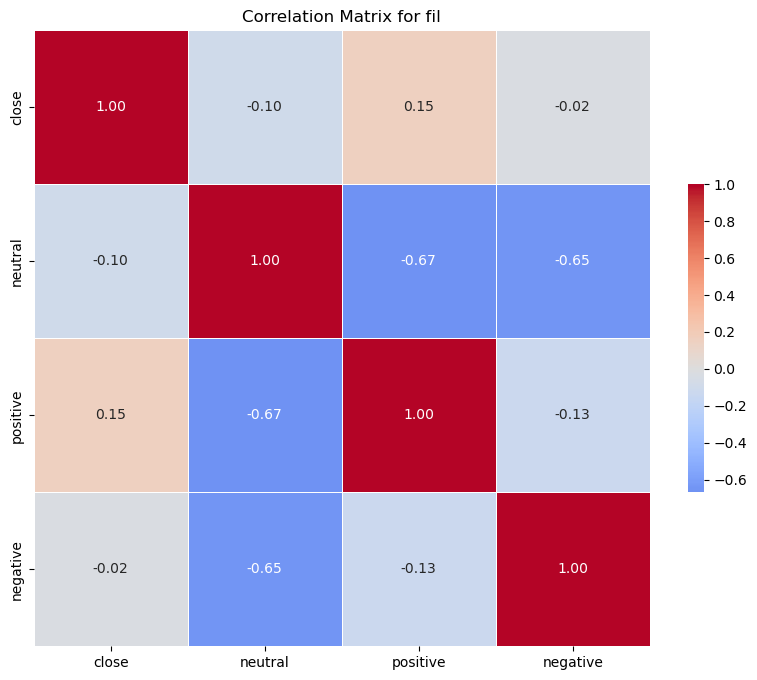

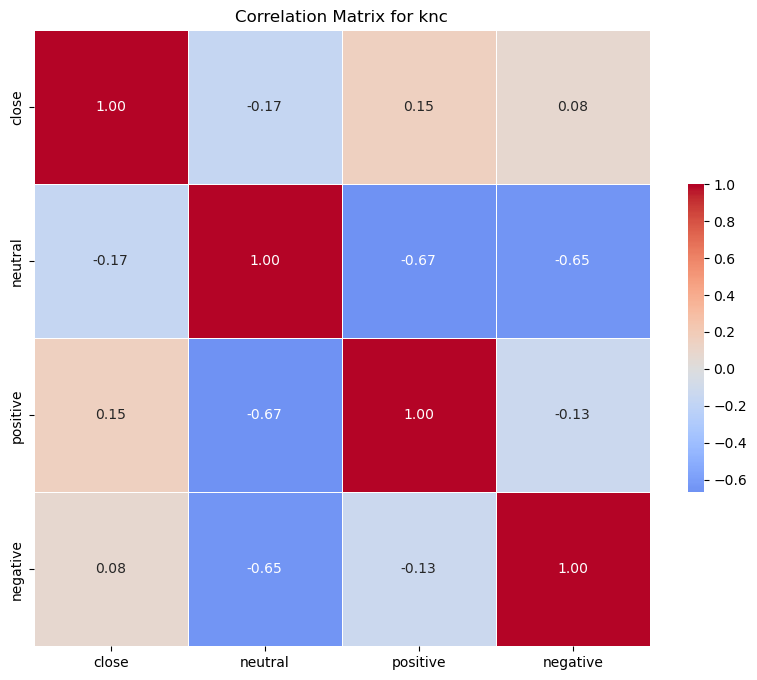

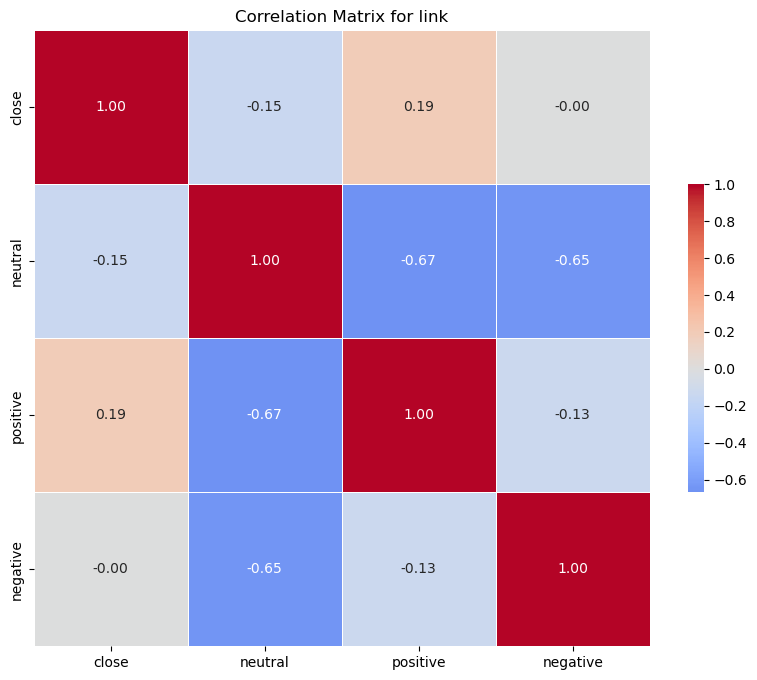

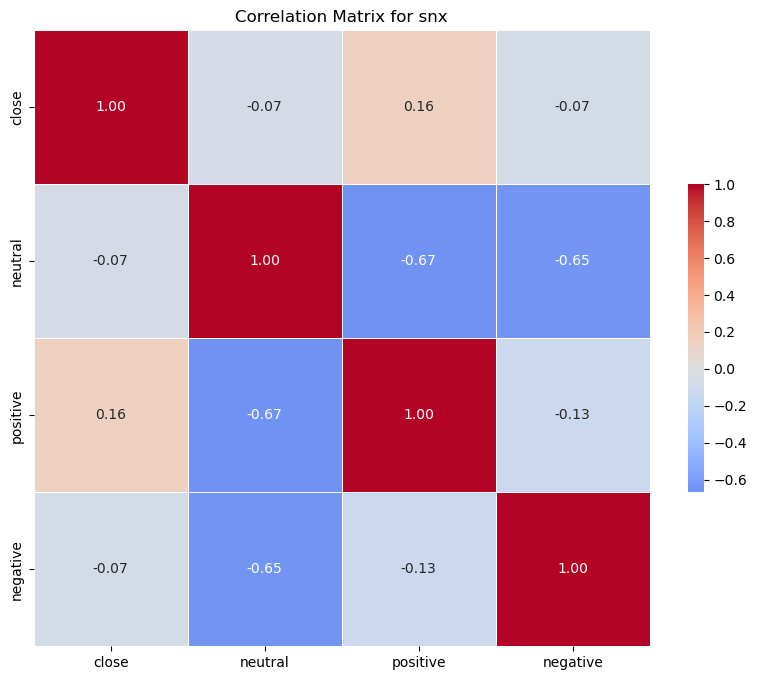

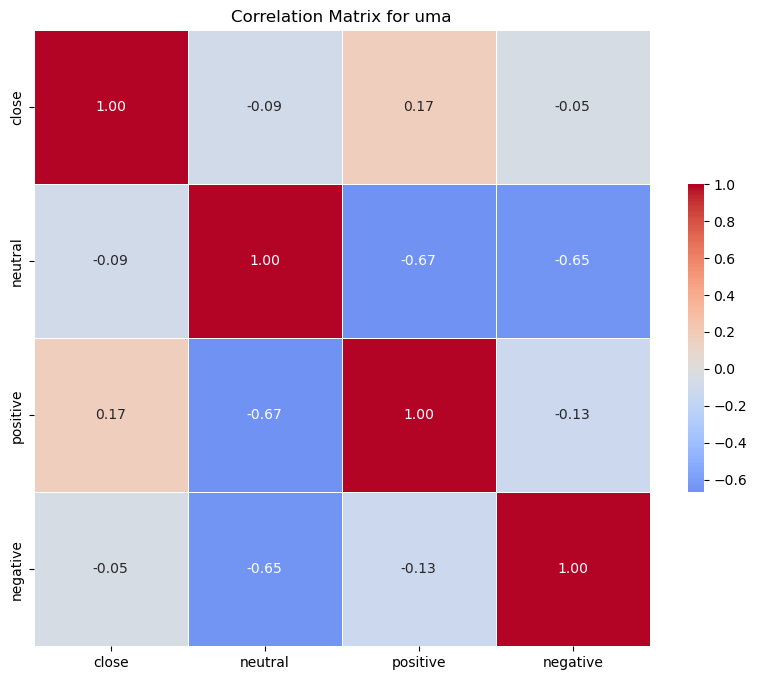

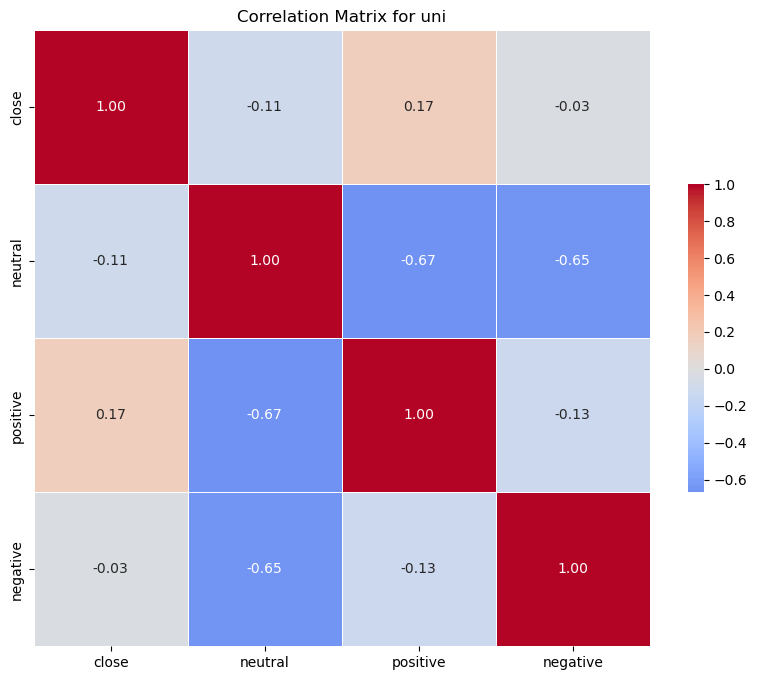

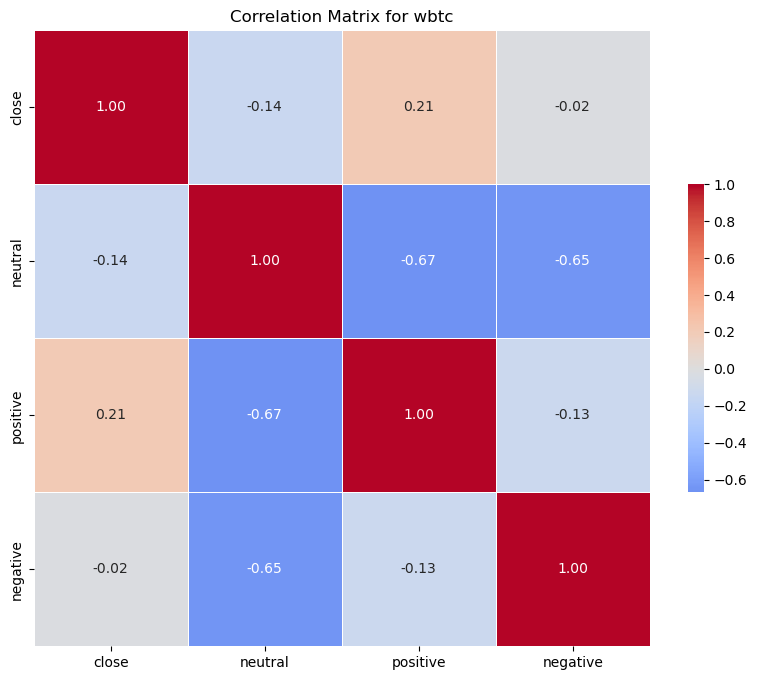

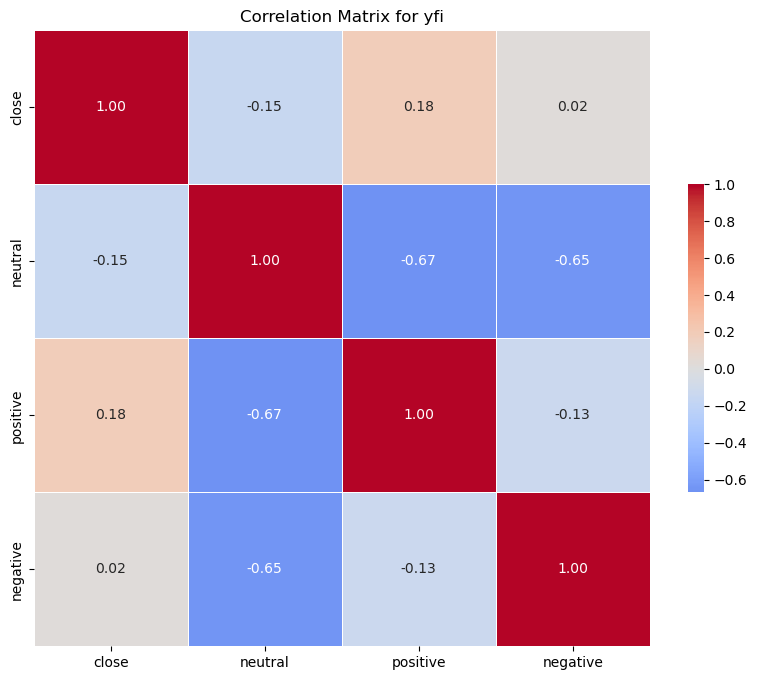

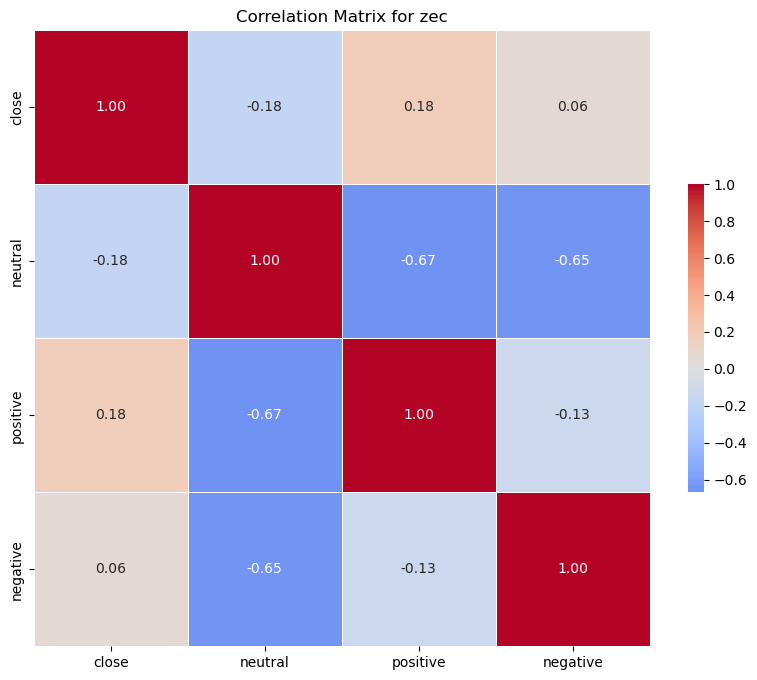

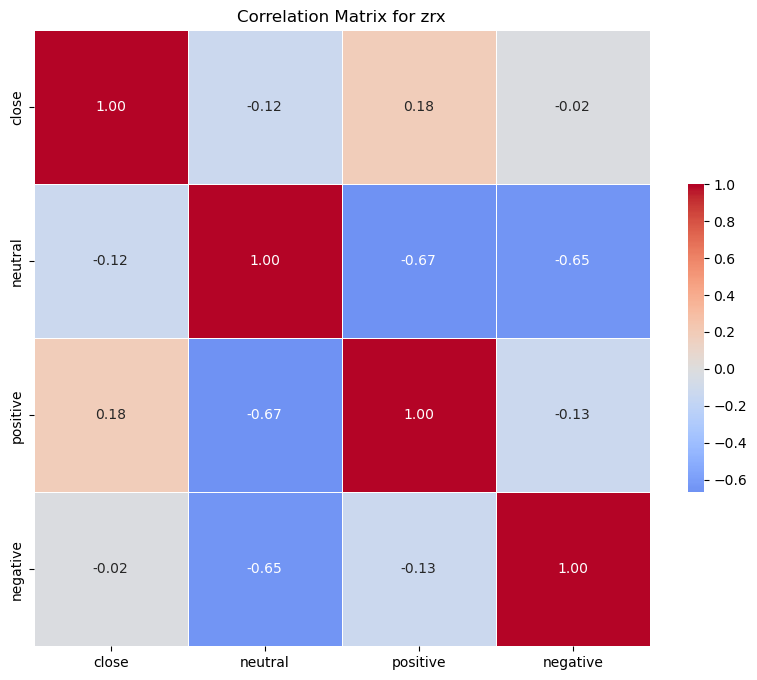

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of unique cryptocurrencies
cryptocurrencies = merged_df['coin_id'].unique()

# List  columns
columns = ['neutral', 'positive', 'negative']


# Plotting correlation plots
for coin in cryptocurrencies:
    # Select data for the current coin
    coin_data = merged_df[merged_df['coin_id'] == coin]
    
    # Compute the correlation matrix for the close price and fed rates for this coin
    correlation_matrix = coin_data[['close'] + columns].corr()
    
    plt.figure(figsize=(10, 8))
    
    # Draw the heatmap with the correlation matrix
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
                vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    plt.title(f'Correlation Matrix for {coin}')
    
    # Show plot
    plt.show()

In [14]:
merged_df

,coin_id,Market Cap,low,high,open,close,volume,3m_yield,2yr_yield,5yr_yield,7yr_yield,10yr_yield,30yr_yield,federal_funds_rate,neutral,positive,negative
timestamp,,,,,,,,,,,,,,,,,
2021-02-01,aave,-0.306440,-0.393619,-0.392502,-0.392657,-0.393087,-0.305786,-0.995393,-1.274771,-1.506332,-1.515965,-1.449299,-1.287740,-0.949611,0.095626,0.149952,-0.278450
2021-02-02,aave,-0.305833,-0.393537,-0.392557,-0.393084,-0.392397,-0.303499,-0.995393,-1.274771,-1.485500,-1.492460,-1.422940,-1.255744,-0.949611,1.097705,-0.749703,-0.703512
2021-02-03,aave,-0.300181,-0.392249,-0.386337,-0.392415,-0.386008,-0.299447,-1.008406,-1.274771,-1.478555,-1.476790,-1.396582,-1.202418,-0.949611,-0.129269,0.756874,-0.591788
2021-02-04,aave,-0.294368,-0.385480,-0.374449,-0.386030,-0.379639,-0.259555,-1.008406,-1.274771,-1.478555,-1.476790,-1.396582,-1.191753,-0.949611,0.584519,-0.620958,-0.150653
2021-02-05,aave,-0.291596,-0.379029,-0.374289,-0.379656,-0.376583,-0.293084,-1.012744,-1.285242,-1.471611,-1.461120,-1.361437,-1.149092,-0.949611,-0.588448,1.518163,-0.749305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-08,zrx,-0.326389,-0.416492,-0.415717,-0.416030,-0.416009,-0.226877,1.307853,1.034117,0.889382,0.865880,0.870262,0.898633,1.337993,0.496123,-0.434589,-0.221363
2023-06-09,zrx,-0.326398,-0.416492,-0.415717,-0.416030,-0.416009,-0.139854,1.303515,1.070766,0.924102,0.897220,0.887834,0.898633,1.337993,0.400070,-0.377992,-0.150827
2023-06-10,zrx,-0.326518,-0.416495,-0.415717,-0.416030,-0.416011,0.082394,1.307853,1.063785,0.917158,0.891996,0.881977,0.891523,1.337993,0.457009,-0.539566,-0.063374


In [15]:
merged_df.to_csv('clean_nodiff_sentiment_copy.csv', index=True)